## Predict Housing Values Using Linear Regression

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


### Exploratory Data Analysis for Linear Relationships

In [2]:
# The Boston Housing Data can be retrieved from sklearn
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

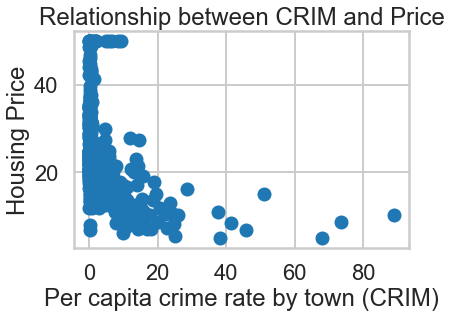

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

The points are definitely not scattered randomly. When the per capita crime rate by town is almost zero, the housing price varies from less than 10 to about 50. When crime rates starts growing, the housig price seems like to decline. Thou, there are still some high housing prices while the crime rate are almost 10.  Therefore, I think the per capita crime rate and housing price could be negatively related, but the association might not be very strong nor linear as there are plenty strange points.

Text(0.5,1,'Relationship Between RM and Price')

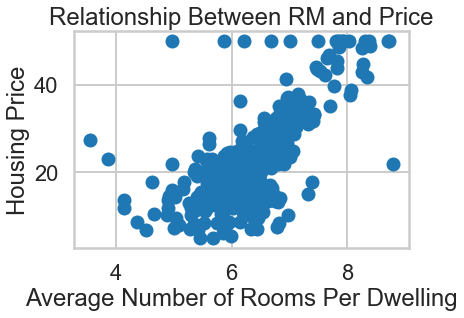

In [13]:
# scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average Number of Rooms Per Dwelling')
plt.ylabel('Housing Price')
plt.title('Relationship Between RM and Price')

A clearly positive relationship is shown here. As the average number of rooms per dwelling increases, the housing price increases too. There are stil some outliers -- the average number of rooms is less than four and yet the housing price is almost 30 and there are some points where the average numbers of rooms are around six and yet the housing price is as high as 50. The majority of the points has indicated a positive linear relationship between the average number of rooms per dwelling and the housing price.

Text(0.5,1,'Relationship between PTRATIO and Housing Price')

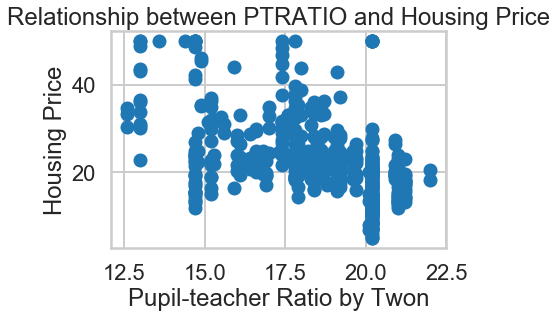

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel('Pupil-teacher Ratio by Twon')
plt.ylabel('Housing Price')
plt.title('Relationship between PTRATIO and Housing Price')

I wouldn't say these points are completely randomly distributed. When the pupil-teacher ratio are less than 14, all the housing prices but one are at or above 30. When the pupil-teacher ratio is more than 20, all the housing prices but one are at or below 30. There might be a negative relationship between the pupil-teacher ratio by town and the housing price. However, the points do not indicate a linear relationship.

Text(0.5,1,'Relationship between INDUS and Housing Price')

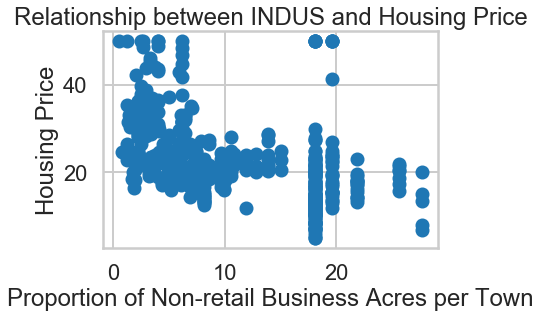

In [15]:
# create a scatter plot between the *INDUS* and *PRICE*
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel('Proportion of Non-retail Business Acres per Town')
plt.ylabel('Housing Price')
plt.title('Relationship between INDUS and Housing Price')

Points are not randomly distributed here either. When the proportion of non-retail business acres per town is above eight, there are only three points that have housing prices above 30. When the proportion grows towards to 20, less and less points have housing price above 20. However, I do not think the negative association is obvious. It is not clear to see a negative relationship from the scatter plot. Neither is a linear relationship.

Text(0.5,1,'Relationship Between Weighted Distances and Housing Price')

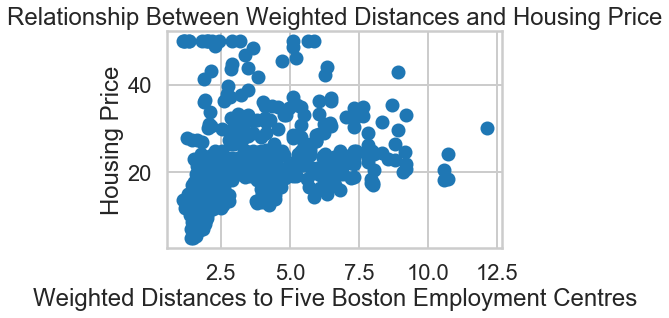

In [16]:
# create a scatter plot between the *DIS* and *PRICE*
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel('Weighted Distances to Five Boston Employment Centres')
plt.ylabel('Housing Price')
plt.title('Relationship Between Weighted Distances and Housing Price')

It is hard to say if there is a negative or a positive relationship between the weighted distances to five boston employmet centres. When the weighted distances are less than 2.5, the housing prices vary from almost zero up tp 50. Once the weighted distances are more than 2.5 and when it increases, the lowest housing price is getting close to 20. Meanwhile, the highest housing prices is decreasing. It seems like the housing prices are spreaded less sparesely. But still, it is hard to say if this is a positive relationship or a negative one.

Text(0.5,1,'Relationship Between Blacks Proportion and Housing Price')

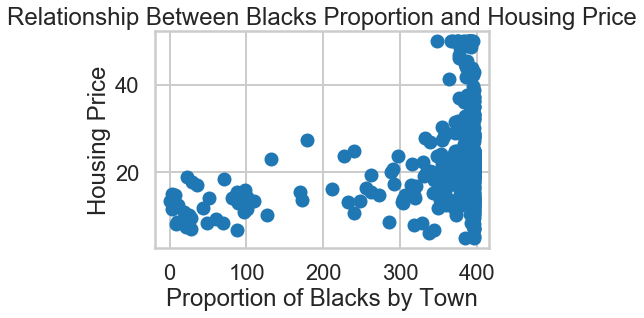

In [17]:
# create a scatter plot between the *B* and *PRICE*
plt.scatter(bos.B, bos.PRICE)
plt.xlabel('Proportion of Blacks by Town')
plt.ylabel('Housing Price')
plt.title('Relationship Between Blacks Proportion and Housing Price')

The points are distributed prettly randomly here. Most of the points are scattered on the right side of the plot and the corresponding housring prices vary from almost zero to 50. No clear relationship is spotted in this scatter plot.

C:\Users\mia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


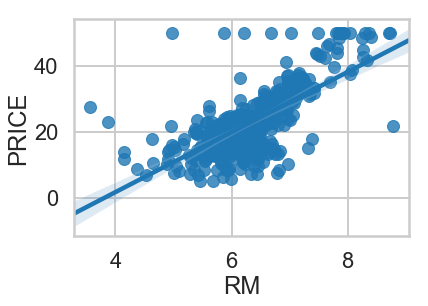

In [18]:
# scatterplots using Seaborn can provide automatic linear regression fits
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


Text(0,0.5,'Frequency')

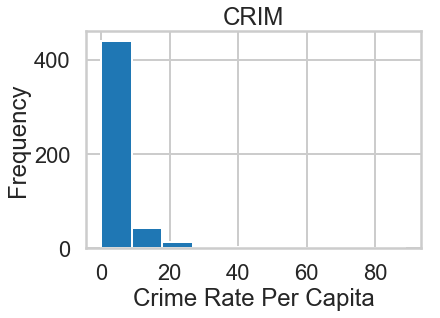

In [19]:
plt.hist(bos.CRIM)
plt.title('CRIM')
plt.xlabel('Crime Rate Per Capita')
plt.ylabel('Frequency')

CRIM is an extremely right-skewed data set.  There are too many observations that have a crime rate less than 20 per capita. It is hard to see how exactly most of the data is distributely, so let's take the log and then plot a histogram.

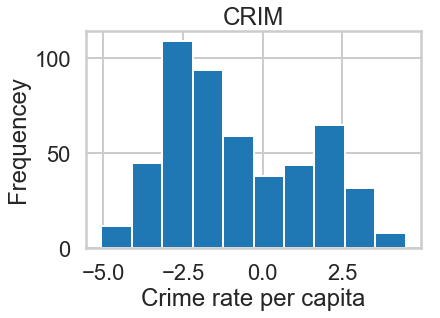

In [20]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

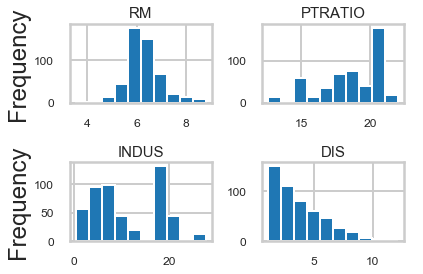

In [21]:

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.subplot(2,2,1)
plt.hist(bos.RM)
#plt.xlabel('Average Number of Rooms Per Dwelling')
plt.ylabel('Frequency')
plt.title('RM', fontsize=15)


plt.subplot(2,2,2)
plt.hist(bos.PTRATIO)
plt.title('PTRATIO', fontsize=15)

plt.subplot(223)
plt.hist(bos.INDUS)
plt.ylabel('Frequency')
plt.title('INDUS', fontsize=15)

plt.subplot(224)
plt.hist(bos.DIS)
plt.title('DIS', fontsize=15)

plt.subplots_adjust( hspace=0.75,wspace=0.35)

I don't really see any correlatins among these four predicators.

### Fitting Linear Regression using `statsmodels`

In [22]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           2.49e-74
Time:                        17:32:40   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 


Text(0.5,1,'Predicted Prices V.S. Original Prices')

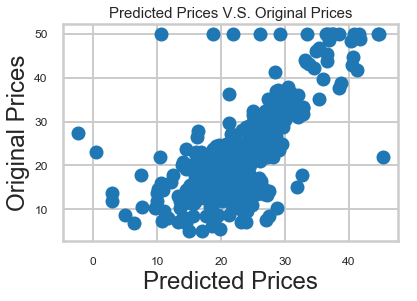

In [24]:
# create a scatterplot between the predicted prices and the original prices
plt.scatter(m.fittedvalues,bos.PRICE)
plt.xlabel('Predicted Prices')
plt.ylabel('Original Prices')
plt.title('Predicted Prices V.S. Original Prices', fontsize=15)

Many of the points are located around the line of y = x, which means most of the predicted values are exactly the same as the original prices or very close to. There are plenty of points are way off the line, which means there are some pretty bad predictions about the housing prices. 

### Fitting Linear Regression using `sklearn`


In [25]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Estimated intercept and coefficients

In [26]:
print('Estimated intercept coefficient: {:0.5}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491


In [27]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [28]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

In [29]:
predicted_prices = lm.predict(X)

Text(0.5,0,'Predicted Price')

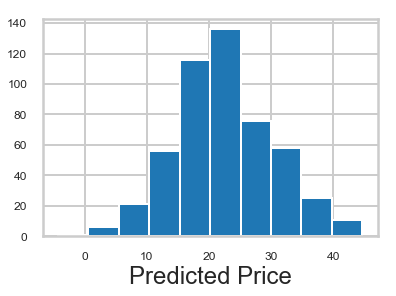

In [30]:
plt.hist(predicted_prices)
plt.xlabel('Predicted Price')

In [31]:
np.sum(predicted_prices <0)

1

This histogram has a belly shape, centered around 22. It looks like a normal distribution. There is one outlier where the predicted prices are below zero, which is not possible in real life.Thus, it can deleted from the data set. 

Text(0.5,1,'Predicted Price V.S. True Price')

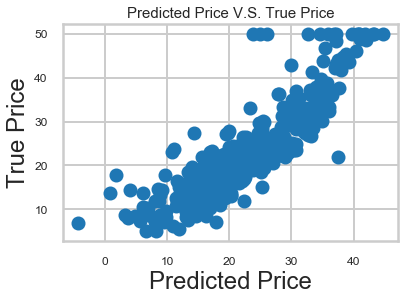

In [32]:
plt.scatter(predicted_prices, bos.PRICE)
plt.xlabel('Predicted Price')
plt.ylabel('True Price')
plt.title('Predicted Price V.S. True Price', fontsize=15)

The points are almost scattered along the line, Y = X. However, there are a few outliers near the origin and up where the predicted prices are about 20 and true prices are 50.

Just by looking at the scatter plots of the predicted prices against the true prices, the dots in the plot with predicted values generated by scikit-learn is less sparsed and much more like a stright line. Also,scikit-learn is more 'pythonic', unlike statsmodel which has the look of statistical formulas. However, statsmodels can provide users more hardcore statistical functionalities, such as p-values, t-test, standard errors on each of the parameters.

### Evaluating the Models

In [33]:
# fit a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town)
p = ols('PRICE ~ PTRATIO', bos).fit()
print(p.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           1.61e-34
Time:                        17:32:41   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

The p-values for both the intercept and the coefficient of PTRATIO are almost zero, which means that the intercept and the coefficient of PTRATIO are both statistically significant for predicting the housing price. The interpretation of the coefficient of PTRATIO is that on average, the housing price will decrease about \$2,200.

The p-values for both the intercept and the coefficient of PTRATIO are almost zero, which means that the intercept and the coefficient of PTRATIO are both statistically significant for predicting the housing price. The interpretation of the coefficient of PTRATIO is that on average, the housing price will decrease about \$2,200 

In [34]:
# exract the R-squared
print('The R-squared of this linear regression model is ', '%.3f' %p.rsquared)

The R-squared of this linear regression model is  0.258


The R-squared is the percentage of the variance in the response variable, housing price, that can be explained by the linear regression model. Therefore, the closer to one it is, the more fitted the linear regression model is. In our PTRATIO and PRICE model, the R-squared is only 0.258, which means the fitness of this model is not really good.

In [35]:
# compute the F-statistic
A = np.identity(len(p.params))
A = A[1:,:]
print(p.f_test(A))

<F test: F=array([[175.10554288]]), p=1.609509478473047e-34, df_denom=504, df_num=1>


The p-value is extremely small, almost zero, thus, the null hypothesis that all coefficients of this model are zero is rejected. That being said, the some of the coefficients are statistically significant for predicting the housing price, but F-statistic does not tell which ones exactly.

#### Fit a model using three variables

In [36]:
# fit a linear regression model using 'CRIM'(per capita crime rate by town), 
# 'RM'(average number of rooms per dwelling), 'PTRATIO'(pupil-teacher ratio by town)
lm3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 19 Mar 2019   Prob (F-statistic):           1.09e-97
Time:                        17:32:41   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

In [37]:
B = np.identity(len(lm3.params))
B = B[1:, :]
print(lm3.f_test(B))

<F test: F=array([[244.22387024]]), p=1.0899937674769618e-97, df_denom=502, df_num=3>


The p-value of the f-statistic is almost zero, so not all of the predictors have zero effect on the housing price.

In [38]:
print('The R-squared of this linear regression model is %.3f' %lm3.rsquared)

The R-squared of this linear regression model is 0.593


R-squared being equal to 0.593 means that the model is a fair fit model, however, R-squared can artificially increase with the increaseing number of predictaors. Adjusted R-squared needs to be checked. It turns out the value of adjusted R-squared is about 0.591, so this model is indeed a fair model.

According to the summary, the p-values of the predicators, CRIM, RM, and PTRATIO, are zero, which means these three predicators are statistically significant for these models. The p-value of the intercept is about 0.4, which means that the intercept statistically does not have significant effect on predicting the housing price. However, in practice, the housing price should not be zero even if all other independent variables have a value of zero. Thus, I think the intercept should be kept for this model.

## Comparing Models

I fit the below mdoel with five independent variables, 'CRIM'(per capita crime rate by town), 'RM'(average number of rooms per dwelling), 'PTRATIO'(pupil-teacher ratio by town), 'DIS'(weighted distances to five Boston employment centres), and 'INDUS' (Proportion of non-retail business acres per town). Then I want to compare this mdoel with the models with only three variables and to see which one is more predictive or fits the data better. Since I am using the `statsmodels`, I can compare the AIC and choose whichever has smaller AIC.

In [39]:
lm5 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + INDUS', bos).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     157.8
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          2.10e-100
Time:                        17:32:41   Log-Likelihood:                -1600.6
No. Observations:                 506   AIC:                             3213.
Df Residuals:                     500   BIC:                             3239.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8447      4.187      0.679      0.4

The AIC is 3213, where the AIC of the model with three variables is 3233. Thus, the full model is better than the reduced one.

Or I can use the F-statistics, the null hypothesis is that the coefficients of the additional two variables are zero.

In [40]:
rss_reduced = np.sum((bos.PRICE - lm3.predict(X)) ** 2)
rss_full = np.sum((bos.PRICE - lm5.predict(X)) ** 2)
df_reduced = len(bos.PRICE) - 3 - 1
df_full = len(bos.PRICE) - 5 -1

In [41]:
F_stat = ((rss_reduced - rss_full)/df_reduced - df_full)/ (rss_full/df_full)
print(F_stat)

-15.041985767051262


In [42]:
dfn = df_reduced - df_full
print('The critical value of F-statistic with degress of freedom of ', dfn, ' and ', df_full, 'is ', stats.f.ppf(0.95, dfn, df_full))

The critical value of F-statistic with degress of freedom of  2  and  500 is  3.013753005713494


The absolute value of the F-statistic is way larger than the critical value (15.04 > 3.01), thus the null hypothesis should be rejected, i.e. the coefficients for the omitted variables in the full model are not all zeros. At least one of the coefficients for the omitted variables is not zero.

<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

Text(0.5,1,'Fitted Values V.S. Residuals')

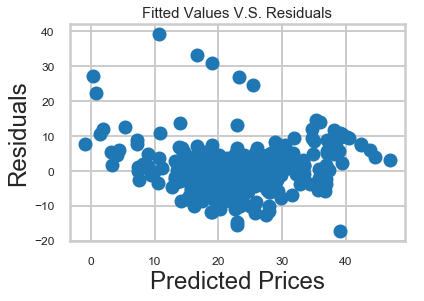

In [43]:
# plot fitted values against residuals using the reduced model
predictedPrices = lm3.predict()
res = bos.PRICE - predictedPrices
plt.scatter(predictedPrices, res)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Fitted Values V.S. Residuals', fontsize=15)

There is no pattern shown in the scatter plot of the predicted prices and the residuals, which means the residual from one prediction has no effect on the residual from another prediction. The assumption that the residuals are identically and independtly distributed is not violated.

Text(0.5,1,'Quantile Plot of Residuals')

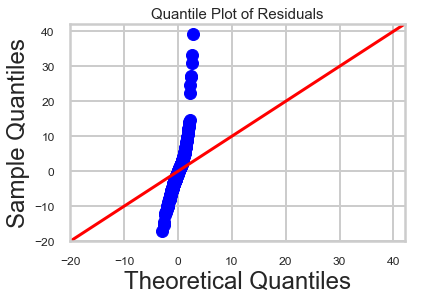

In [44]:
fig = sm.qqplot(res, line='45')
plt.title('Quantile Plot of Residuals', fontsize=15)

The errors are apparently not normally distributed, which violates the assumption about residuals, according to this quantile plot.

The scatter plot of predicted values vesus residuals can tell us if the assumption about residuals being i.i.d is violated. The quantile plot of residuals can indicate if the assumption of residuals being normally distributed is violated.

Text(0.5,1,'Predicted Prices V.S. Residuals')

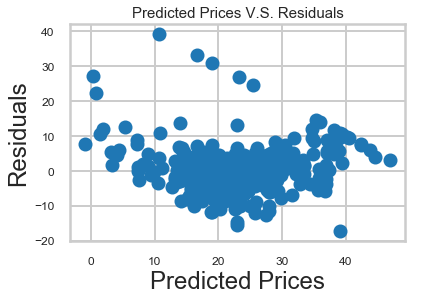

In [45]:
plt.scatter(lm3.predict(), res)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Predicted Prices V.S. Residuals', fontsize=15)

In [46]:
outliers = lm3.outlier_test(method='bonferroni').loc[np.abs(lm3.outlier_test(method='bonferroni').iloc[:,0]) > 3]
print(outliers)

     student_resid       unadj_p  bonferroni(p)
364      -3.003755  2.800096e-03   1.000000e+00
365       4.794565  2.152677e-06   1.089254e-03
367       3.900468  1.090998e-04   5.520450e-02
368       7.030058  6.791305e-12   3.436401e-09
369       4.664612  3.972253e-06   2.009960e-03
370       4.258146  2.461981e-05   1.245763e-02
371       5.425650  9.005087e-08   4.556574e-05
372       5.858542  8.466152e-09   4.283873e-06


Usually, an abservation with an studentized residual that is larger than 3 (in absolute value) is considered as an outlier. Thereby, I pick out all the rows whose student_resid in absolute value is greater than 3.

In [47]:
bos_outliers = bos.loc[outliers.index, ['CRIM','RM','PTRATIO','PRICE']]
bos_outliers

,CRIM,RM,PTRATIO,PRICE
364,3.47428,8.780,20.2,21.9
365,4.55587,3.561,20.2,27.5
367,13.52220,3.863,20.2,23.1
368,4.89822,4.970,20.2,50.0
369,5.66998,6.683,20.2,50.0
370,6.53876,7.016,20.2,50.0
371,9.23230,6.216,20.2,50.0
372,8.26725,5.875,20.2,50.0


In [48]:
bos_outliers.loc[:,'PREDICTED'] = lm3.predict(bos_outliers.iloc[:, :-1])
bos_outliers

,CRIM,RM,PTRATIO,PRICE,PREDICTED
364,3.47428,8.780,20.2,21.9,39.102779
365,4.55587,3.561,20.2,27.5,0.359783
367,13.52220,3.863,20.2,23.1,0.776834
368,4.89822,4.970,20.2,50.0,10.691218
369,5.66998,6.683,20.2,50.0,23.179862
370,6.53876,7.016,20.2,50.0,25.462335
371,9.23230,6.216,20.2,50.0,19.012691
372,8.26725,5.875,20.2,50.0,16.690622


In [49]:
bos_outliers.loc[:,'STUDENT_RESID'] = np.abs(outliers.loc[:,'student_resid'])
bos_outliers.sort_values(by='STUDENT_RESID', ascending=False)

,CRIM,RM,PTRATIO,PRICE,PREDICTED,STUDENT_RESID
368,4.89822,4.970,20.2,50.0,10.691218,7.030058
372,8.26725,5.875,20.2,50.0,16.690622,5.858542
371,9.23230,6.216,20.2,50.0,19.012691,5.425650
365,4.55587,3.561,20.2,27.5,0.359783,4.794565
369,5.66998,6.683,20.2,50.0,23.179862,4.664612
370,6.53876,7.016,20.2,50.0,25.462335,4.258146
367,13.52220,3.863,20.2,23.1,0.776834,3.900468
364,3.47428,8.780,20.2,21.9,39.102779,3.003755


In [50]:
print('The means of variables, CRIM, RM, PTRATIO, of the observed data are the following: ')
print(bos.loc[:,['CRIM','RM','PTRATIO']].mean())

The means of variables, CRIM, RM, PTRATIO, of the observed data are the following: 
CRIM        3.593761
RM          6.284634
PTRATIO    18.455534
dtype: float64


All these outliers have the same value for the pupil-teacher ratio(PTRATIO), which is greater than the mean of PTRATIO. All but one outliers have values of per capita crime rate by twon（CRIM）that are greater than the mean of CRIM. Most of the outliers have values for average number of rooms per dwelling (RM) that are less than the mean of RM. All but one of these data points that have a predicted price less than the observed housing price. However, it makes sense that the higher the crime rate is and the less the average room number is, the lower the housing price should be. Thus, those outliers might represent some bad observed data points.

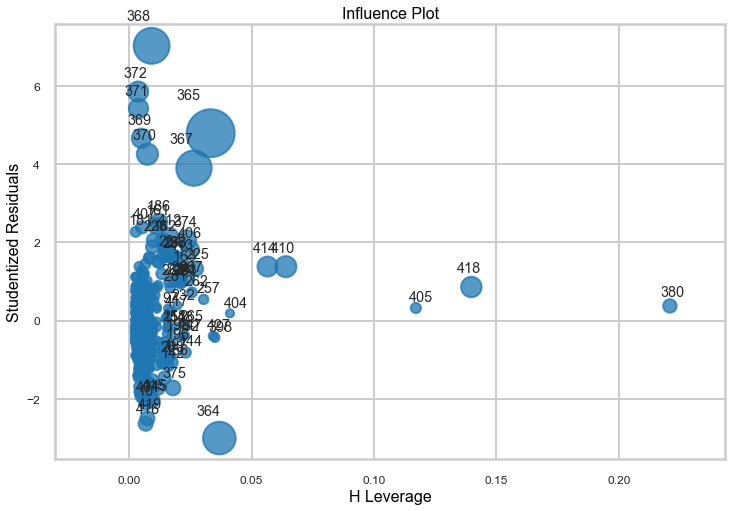

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm3, ax=ax, criterion ='cooks')

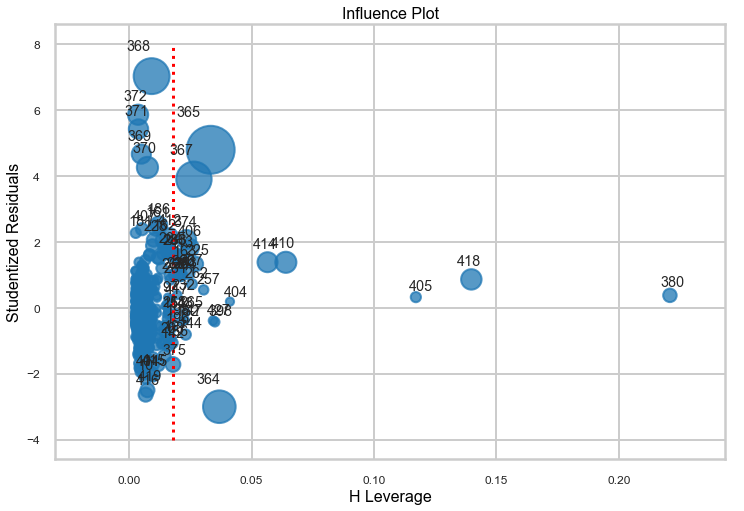

In [52]:
hat_h = 3 * (3/len(bos.PRICE))
x = hat_h
ax.vlines(x, ymin=-4, ymax=8, colors='r', linestyle='dotted')
fig

Any point on the right-hand side of the red line in the graph has a high leverage. The red line represents three times the ratio of the number of parameters in my model and the number of data points. 

In [53]:
bos.loc[[365,367,404,405,418,380],['CRIM','RM','PTRATIO','PRICE']]

,CRIM,RM,PTRATIO,PRICE
365,4.55587,3.561,20.2,27.5
367,13.52220,3.863,20.2,23.1
404,41.52920,5.531,20.2,8.5
405,67.92080,5.683,20.2,5.0
418,73.53410,5.957,20.2,8.8
380,88.97620,6.968,20.2,10.4


All but one of those high-leverage points have values of CRIM that are much greater than the mean of CRIM. They might come from the same town where the crime rate is quite high.

In [54]:
le = lm3.get_influence().hat_matrix_diag
le = pd.DataFrame(le)
le.columns = ['h']
high_leverages = le.loc[abs(le.h.values) > hat_h, :]

In [55]:
updated_bos = bos.drop(high_leverages.index)
updated_bos = updated_bos.drop(bos_outliers.index[3:])

In [56]:
updated_lm3 = ols('PRICE ~ CRIM + RM + PTRATIO', updated_bos).fit()
print(updated_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     387.7
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.28e-126
Time:                        17:32:43   Log-Likelihood:                -1355.4
No. Observations:                 470   AIC:                             2719.
Df Residuals:                     466   BIC:                             2735.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1512      3.560     -3.413      0.0

The R-squared and the adjusted R-squared both increases a lot. R-squared increases from 0.593 to 0.714 and adjusted R-squared increases from 0.591 t0 0.712. This means that removing the outliers and high-leverage points, the fitness of my model improves a lot.